# Dataset Description

direct marketing campaigns of a  Portuguese banking institution.The marketing campaigns  were based on phone calls. Often, more than one contact to  the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed

# Objective: 

  The classification goal is to predict if the client will subscribe  (yes/no) a term deposit (variable y).

# 1. Import the necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

# 2. Read the data as a data frame 

In [7]:
dataframe=pd.read_csv('bank-full.csv')

In [8]:
dataframe.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Perform basic EDA which should include the following and print out your insights at every step. 

# a. Shape of the data 

In [9]:
dataframe.shape

(45211, 17)

# b. Data type of each attribute

In [10]:
dataframe.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

# c. Checking the presence of missing values

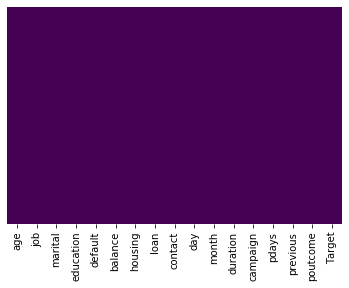

In [11]:
#visualiation of misssing value in heat map
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
dataframe.info() #lets have a ook attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# d. 5 point summary of numerical attributes

In [13]:
dataframe.describe()  # using describe we can understand numerical data how spread is and skewsness aslo.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
dataframe.describe().transpose() #using transpose function on describe function

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# e. Checking the presence of outliers

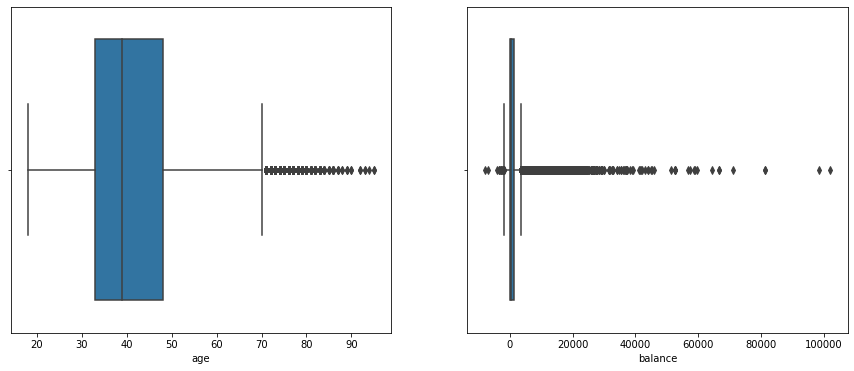

In [15]:
#lets check outliers in numerical columns
#showing  outliers in age and balance column
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(dataframe['age'],ax=a)
sns.boxplot(dataframe['balance'],ax=b)



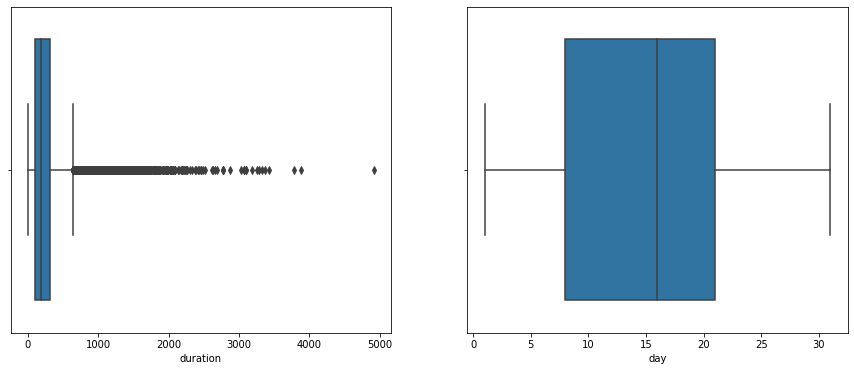

In [16]:
#showing out liers in duration and day column
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(dataframe['duration'],ax=a)
sns.boxplot(dataframe['day'],ax=b)


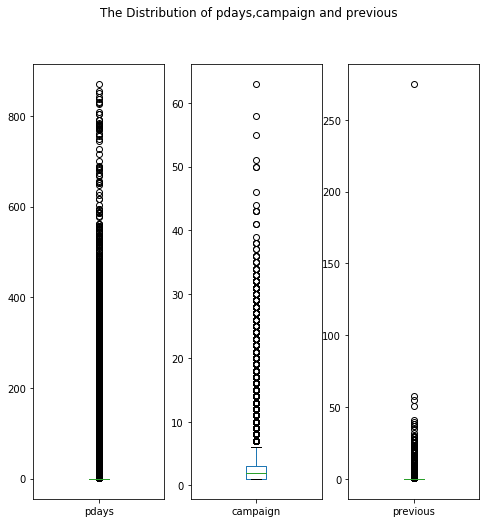

In [17]:
#showing outlers in duration and campaign cloumn
dist_dur_cam = dataframe[['pdays','campaign','previous']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of pdays,campaign and previous')
plt.show()

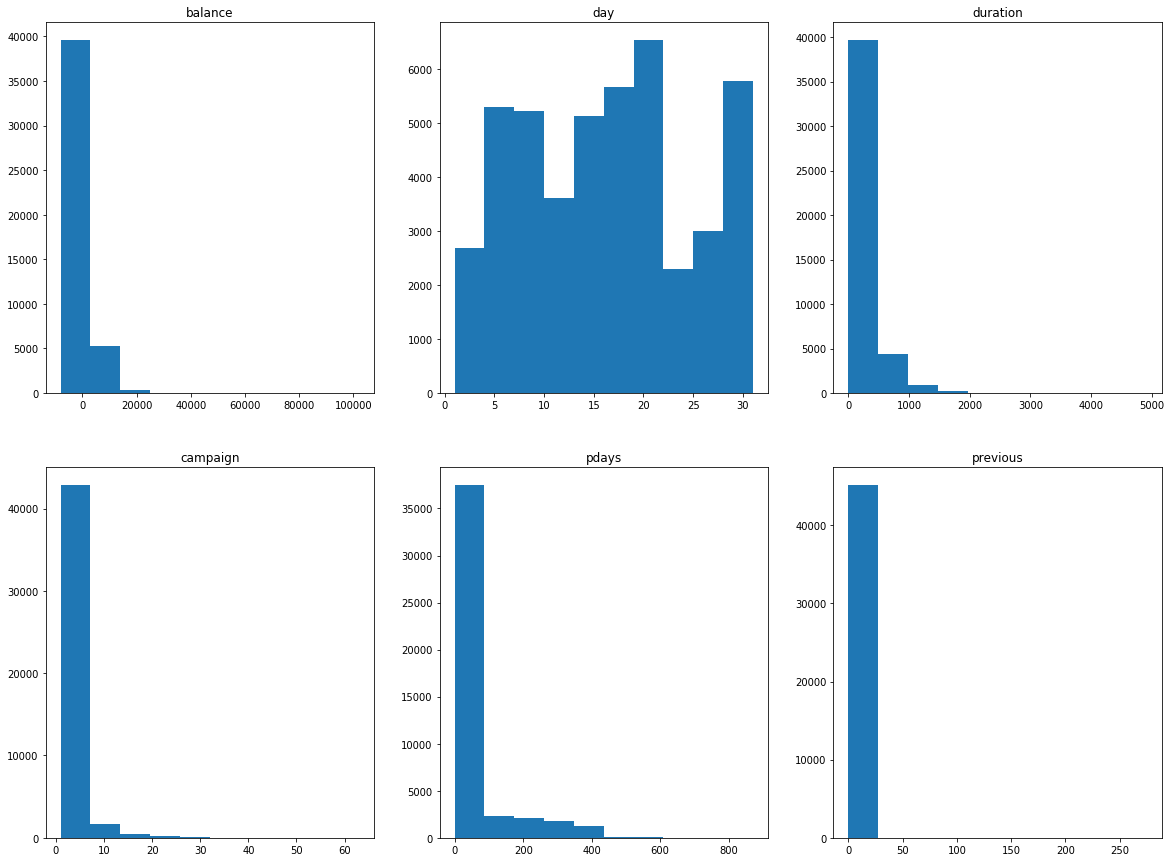

In [18]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(dataframe[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

above there  is outliers in numerical cloumns and campaign,pdays,previous cloumns are having outliers

we can celarely see in above example that pdays and campaign adn previous cloumns are having outliers

In [19]:
dataframe.skew()  # will show you the skewness of each column numerical

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [20]:
dataframe.dtypes #lets have a look at data  types of attributes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

lets check the categorical cloumns distribution

# Lets do univariate analysis for categorical variables

In [21]:
job=dataframe['job'].value_counts()

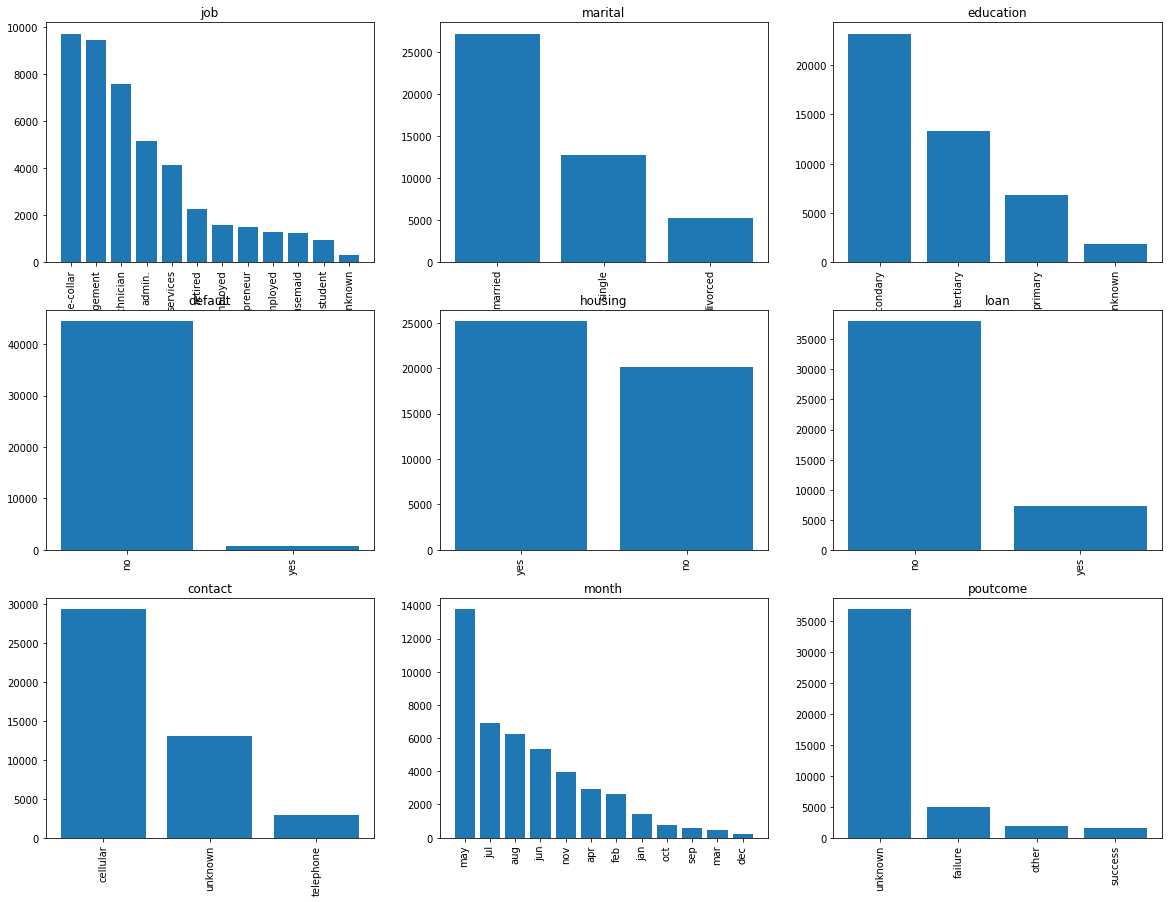

In [22]:
#lets see the distribution of categorical cloumns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = dataframe[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()


In [23]:
# lets look at the target cloumns distribution and we can see tehre great imabalance in dataset

target=dataframe['Target'].value_counts()
target

no     39922
yes     5289
Name: Target, dtype: int64

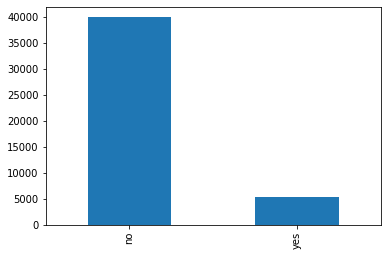

In [24]:
target.plot(kind='bar')  #you can see there is imbalance in distirbution cloumn

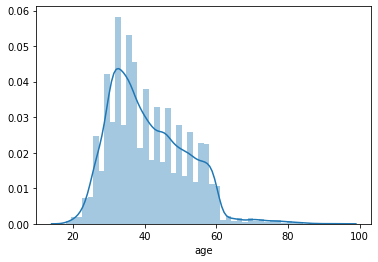

In [25]:
sns.distplot(dataframe.age) # we can seee in dataset that people who are between 25 to 35 are dominating dataset


In [26]:
dataframe.Target.value_counts() # we can see target cloumn is having bias towards classification 'no'


no     39922
yes     5289
Name: Target, dtype: int64

In [27]:
countNo = len(dataframe[dataframe.Target == 'no'])
countYes = len(dataframe[dataframe.Target == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(dataframe.Target))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(dataframe.Target))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


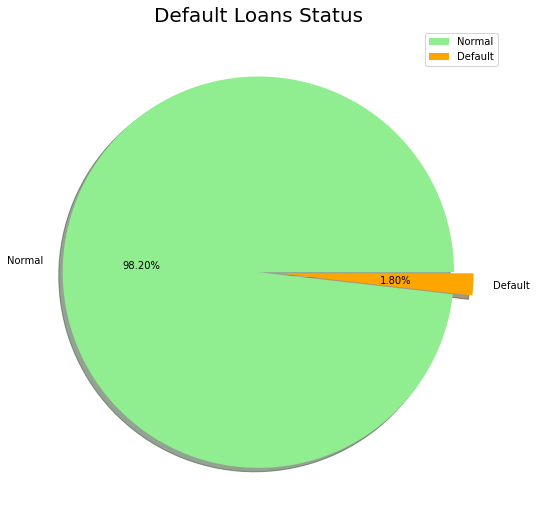

In [28]:
# lets see pie plot for Default Loans Status
labels = ['Normal', 'Default']
size = dataframe['default'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Default Loans Status', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

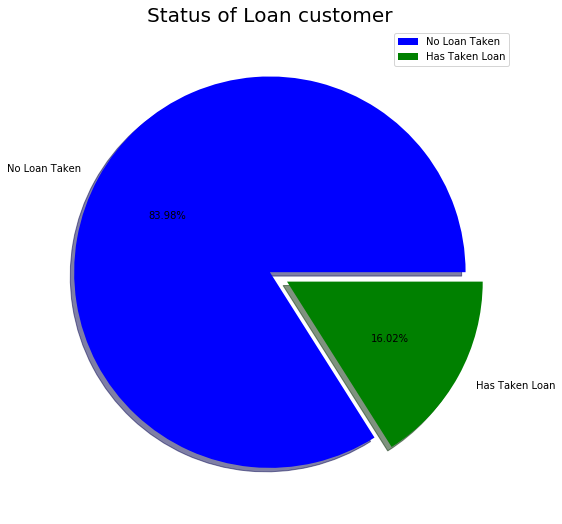

In [29]:
# lets see pie plot for Status of Loan customer
labels = ['No Loan Taken','Has Taken Loan']
size = dataframe['loan'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Loan customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

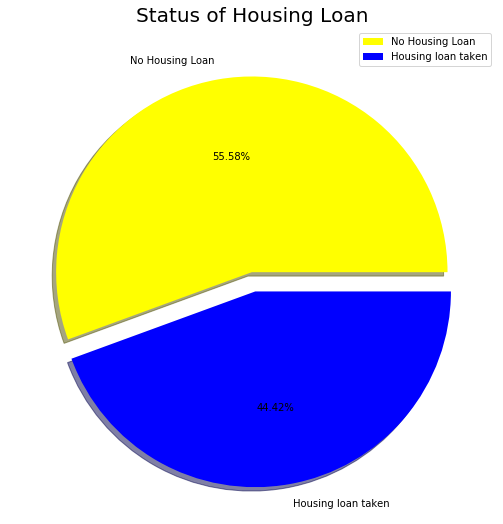

In [30]:
# lets see pie plot for Status of  Housing Loan
labels = ['No Housing Loan','Housing loan taken' ]
size = dataframe['housing'].value_counts()
colors = ['yellow', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Housing Loan', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Bivariate analysis

In [31]:
#lets have a look at how each attribute having relationship with target variable

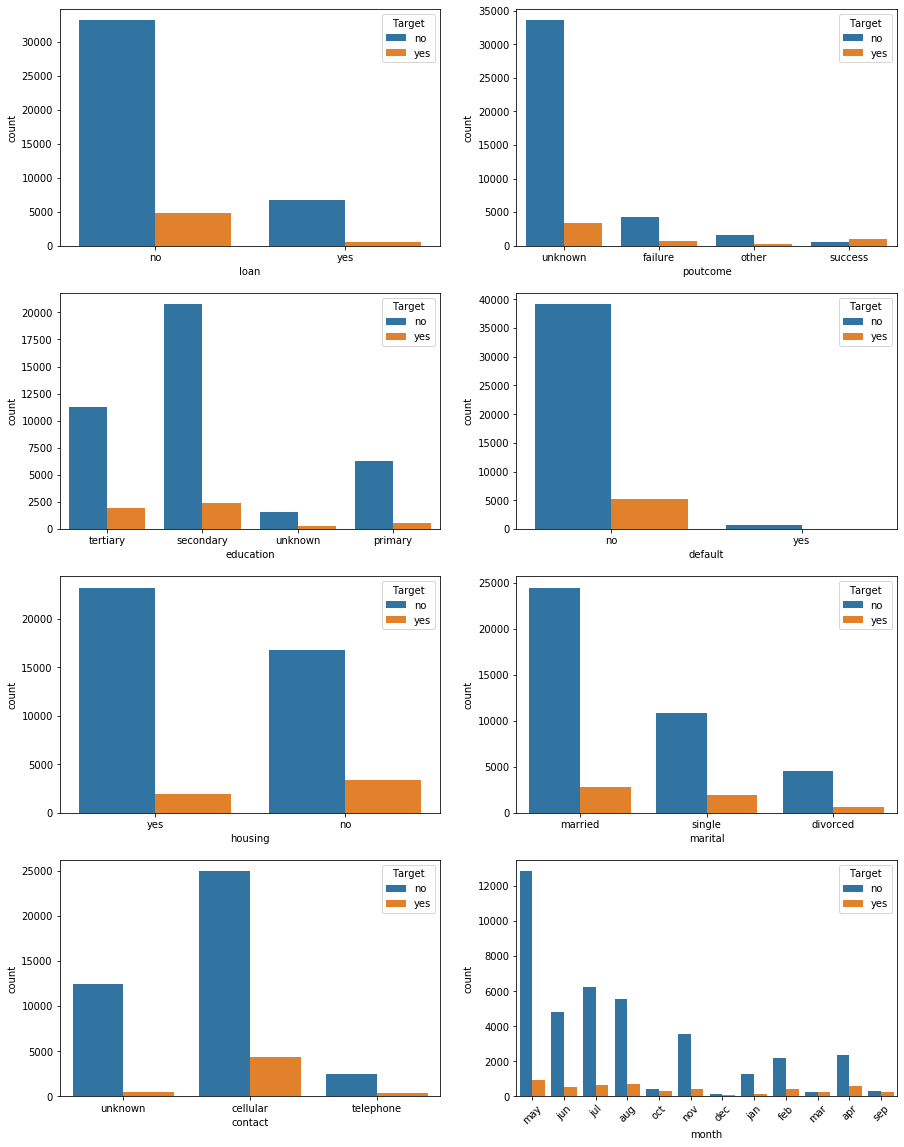

In [32]:
#lets ahve a look at how  target variable ' target' distrubuted across  individual atrributes ,using income as hue
import seaborn as sns
fig, ((a,b),(c,d),(e,f),(g,h)) = plt.subplots(4,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(dataframe['marital'],hue=dataframe['Target'],ax=f)
sns.countplot(dataframe['poutcome'],hue=dataframe['Target'],ax=b)
sns.countplot(dataframe['education'],hue=dataframe['Target'],ax=c)
sns.countplot(dataframe['default'],hue=dataframe['Target'],ax=d)
sns.countplot(dataframe['housing'],hue=dataframe['Target'],ax=e)
sns.countplot(dataframe['loan'],hue=dataframe['Target'],ax=a)
sns.countplot(dataframe['contact'],hue=dataframe['Target'],ax=g)
sns.countplot(dataframe['month'],hue=dataframe['Target'],ax=h)




1)loan cloumn relationship with  target cloumn------(less number of people are have subscribed which says 'yes',those are all the people are having less loan and people who dint subscribe more number people are having loan)

2)unknown column relationship with  target cloumn target---its dominated with big 'no'

3)education cloumn relationship with  target cloumn target=====secondary type of education people are subscribed more

4)defaultcloumn relationship with  target cloumn target=====people ar whoc are not default in loan are the people are subscribed more
5)housing cloumn relationship with  target cloumn target-------people who dont haive housing loan are the people much lieky to be subscribed more
6)marital cloumn relationship with  target cloumn tagret----people who are amrried are likely to subscirbed more
7)contact cloumn relationship with  target cloumn target---------people who are cell phones are the people whoc subsribed more
8)month cloumn relationship with  target cloumn target---people are subsribed in the may,june,july,aug,oct are more 



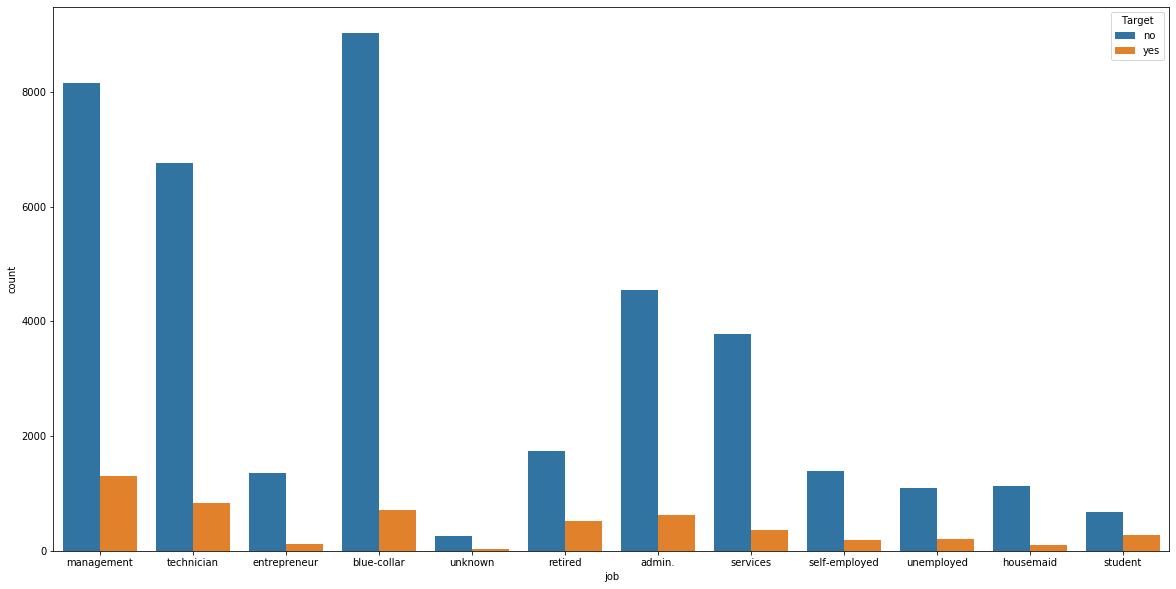

In [33]:
# lets have look  a at job cloumn over targer varible'Target'

plt.subplots(1,1,figsize=(20,10))

sns.countplot(dataframe['job'],hue=dataframe['Target'])


You can see above managment job type,techincian  and blue collar jop type having weightage  in datset,those are all the people who subsribed more  and
dataset is dominated  by 'no' subscriptoions when you caompare to 'yes'

In [34]:
# Visualize the distribution of 'duration' & 'campaign'¶
# duration cloumn is havig high impact on target variable  as given in attribute info of dataset ,so lets visualize


In [35]:
# Step 1: Change the unit of 'duration' from seconds to minutes
dataframe['duration'] = dataframe['duration'].apply(lambda n:n/60).round(2)

In [36]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (dataframe['duration']<5/60)
dataframe = dataframe.drop(dataframe[condition2].index, axis = 0, inplace = False)

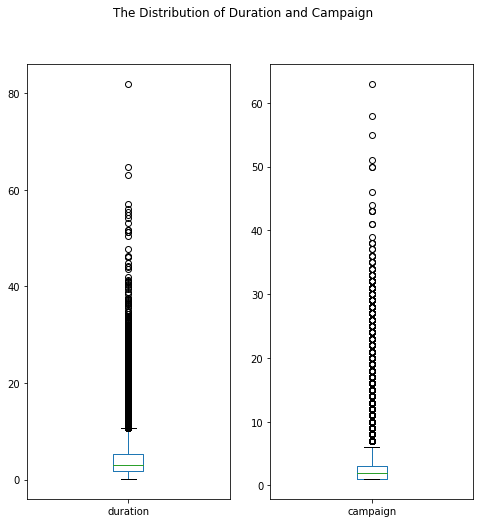

In [37]:
duration_camp = dataframe[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

In [38]:
#Visualize the relationship between 'duration' & 'campaign': with Traget  result

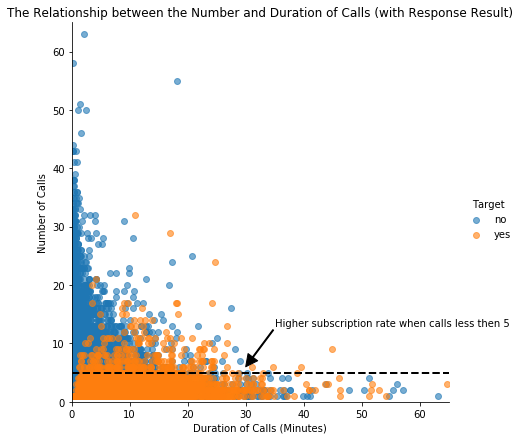

In [39]:
import seaborn as sns
duration_camp = sns.lmplot(x='duration', y='campaign',data = dataframe,
                     hue = 'Target',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =6)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls less then 5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Important note: 'duration' attribute highly affects the output
    
we can observe from above analsysis that when calls are lesser than 5 and we can see more number of subscriptions 

# Multivariate analysis

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

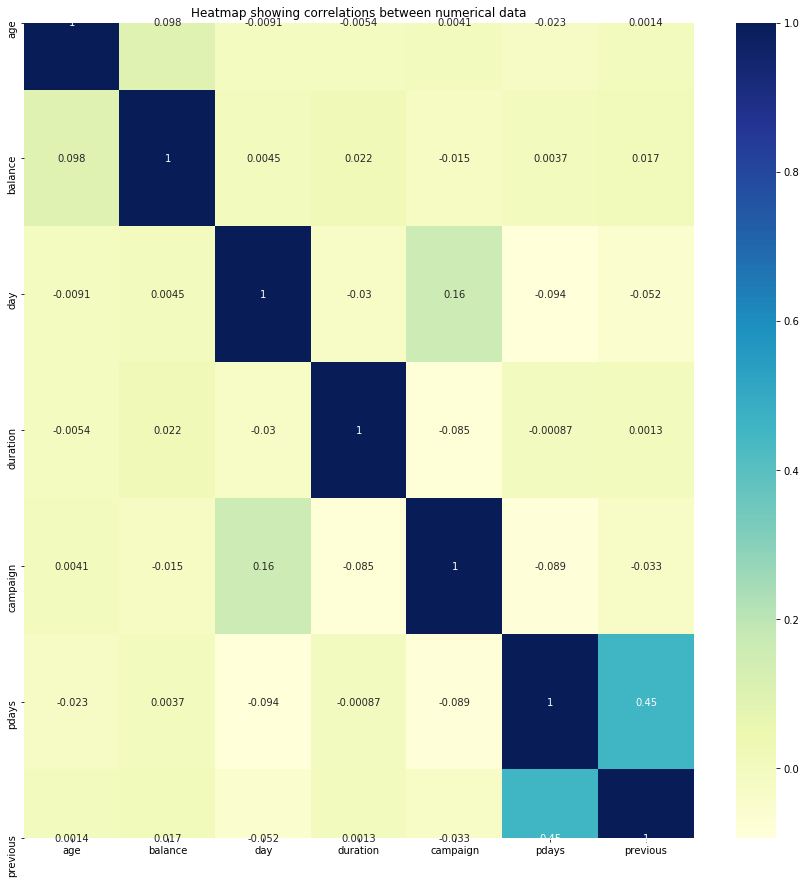

In [40]:
#checking the co relationship with all the varibles
plt.figure(figsize=(15,15))  
sns.heatmap(dataframe.corr(),cmap='YlGnBu',annot=True)
#adult.corr()
plt.title('Heatmap showing correlations between numerical data')

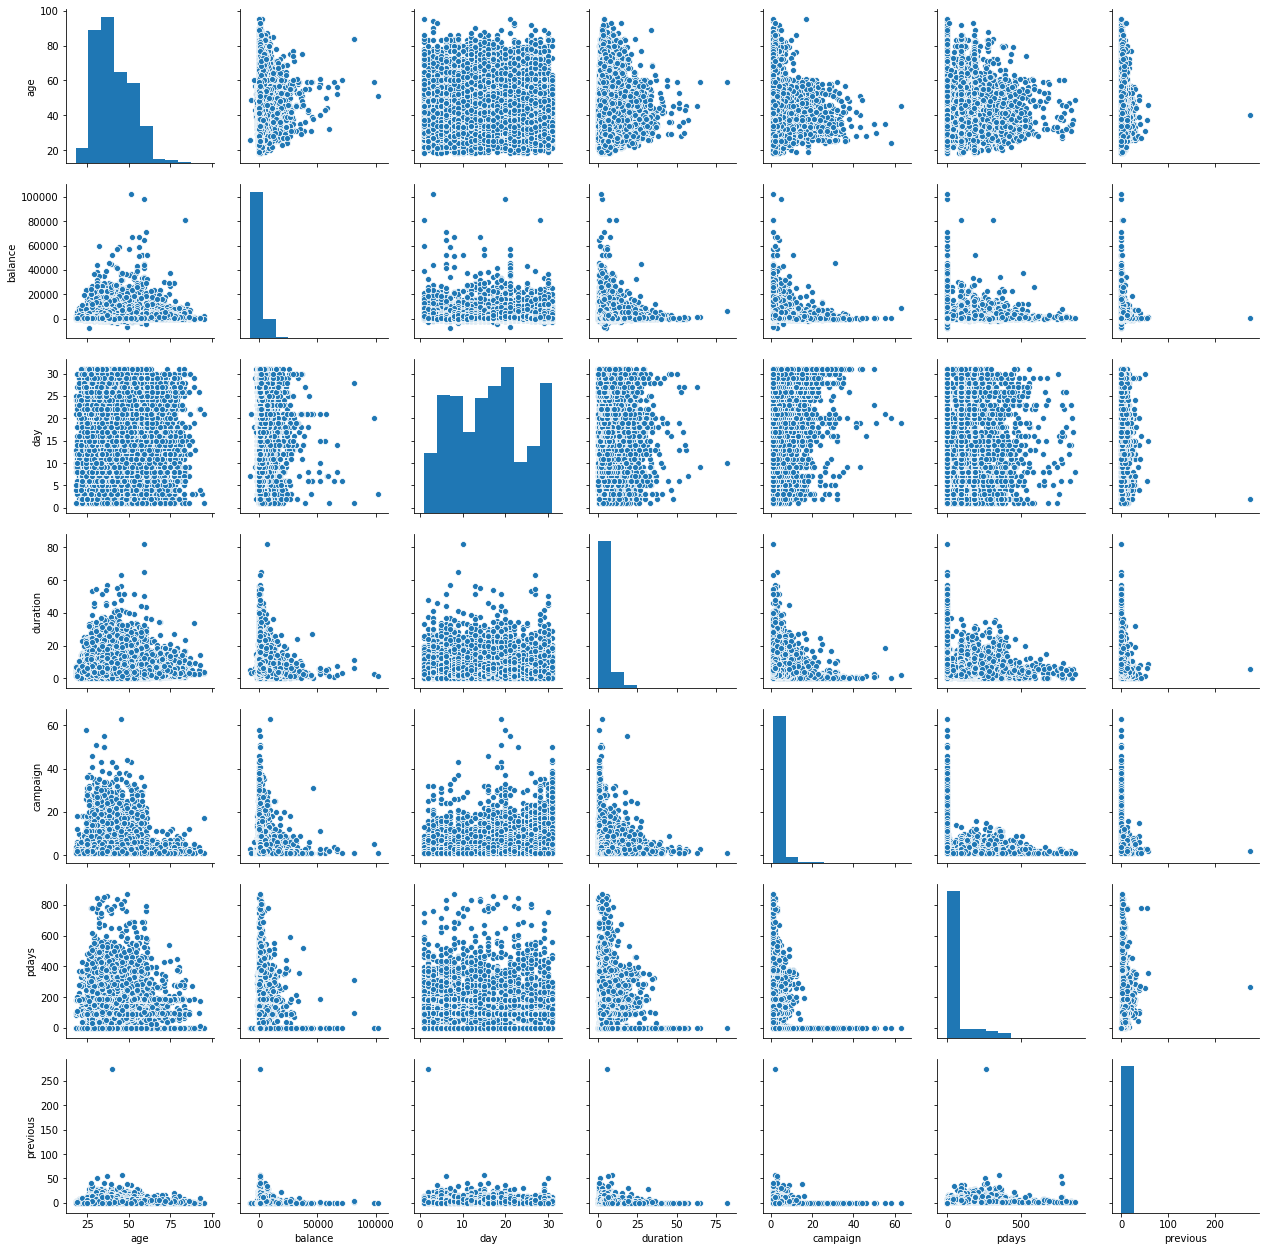

In [41]:
sns.pairplot(dataframe)  # showing paitplot for attributes  too see the mtovariate analsysis

In [42]:
#lets visulaize how target coloumn distributed usig pie plot

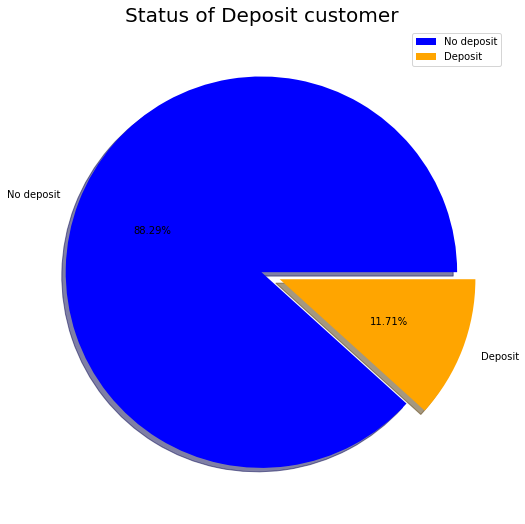

In [43]:
labels = ['No deposit','Deposit']
size = dataframe['Target'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Deposit customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# 4.  Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

No missing values in daatset but some values like unknown and others helplessliek missing values we will remove from dataset

In [44]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = dataframe.poutcome == 'other'
dataframe = dataframe.drop(dataframe[condition].index, axis = 0, inplace = False)


In [45]:
# Step 2: Fill 'unknown' in job and education to 'other'
dataframe[['job','education']] = dataframe[['job','education']].replace(['unknown'],'other')

In [46]:
#drop irrelevant columns
dataframe = dataframe.drop(columns = ['pdays'])

In [47]:
dataframe.shape

(43312, 16)

In [48]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,0,unknown,no


# Transforming dataset

In [49]:
# Step 1: Change column name: 'target' to 'y'
dataframe.rename(index=str, columns={'Target': 'y'}, inplace = True)



In [50]:
dataframe.head() # now we can see target column has cahnged to 'y'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,0,unknown,no


In [51]:
#lets convert target colomns to binary 0 and 1

In [52]:
def convert(dataframe, new_column, old_column):
    dataframe[new_column] = dataframe[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataframe[new_column].value_counts()

convert(dataframe, "y", "y")

0    38330
1     4982
Name: y, dtype: int64

In [53]:
dataframe.head() #lets have a look at connverted target cloumn 'y'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,0,unknown,0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,0,unknown,0
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,0,unknown,0


In [54]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies
dataframe_tr= pd.get_dummies(dataframe, drop_first=True)
print("Number of feautres after one-hot encoding {}".format(len(list(dataframe_tr))))


Number of feautres after one-hot encoding 41


In [55]:
dataframe_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 0 to 45209
Data columns (total 41 columns):
age                    43312 non-null int64
balance                43312 non-null int64
day                    43312 non-null int64
duration               43312 non-null float64
campaign               43312 non-null int64
previous               43312 non-null int64
y                      43312 non-null int64
job_blue-collar        43312 non-null uint8
job_entrepreneur       43312 non-null uint8
job_housemaid          43312 non-null uint8
job_management         43312 non-null uint8
job_other              43312 non-null uint8
job_retired            43312 non-null uint8
job_self-employed      43312 non-null uint8
job_services           43312 non-null uint8
job_student            43312 non-null uint8
job_technician         43312 non-null uint8
job_unemployed         43312 non-null uint8
marital_married        43312 non-null uint8
marital_single         43312 non-null uint8
education_prim

In [56]:
#lets scale data to bring all dimensions to normal scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [57]:
# Apply Scaling  and wll drop drop the target cloumn'deposit_binary' 
std_scale = preprocessing.StandardScaler().fit(dataframe_tr.drop('y', axis=1))
X = std_scale.transform(dataframe_tr.drop('y', axis=1))
y = dataframe_tr['y']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# 5. Train a few standard classification algorithms, note and  comment on their performances along different metrics.  

# Classifications Methods: 

Logistic Regression
Decision Tree
Random Forest
Naive Byes
SVM Model
KNN Model

In [58]:
#will split data in to training and tests using random test function
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 30318 samples.
Testing set has 12994 samples.


# Lets build  Different supervised standard classification machine learning  models

# Since dataset is imbalanced  we cannot depend on overall accuracy of model we will print out confusion matrix for all classification models to see class level acuracy

In [59]:
#####################################################################################################################

#   logistic regression model and Model Evaluation using Confusion Matrix


# Hyperparameter Search for Logistic Regression

In [60]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   14.9s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   24.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [61]:
clf.best_params_


{'C': 1.0}

# Logistic Regression

In [62]:
logistic = LogisticRegression(C=1,penalty='l2', verbose=5,solver="lbfgs",max_iter=100)
logistic.fit(X_train, Y_train)
y_pred = logistic.predict(X_test)
score_logistic = logistic.score(X_test,Y_test)
print('The accuracy of the Logistic Regression is', score_logistic)

print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The accuracy of the Logistic Regression is 0.8992611974757581
[[11164   345]
 [  964   521]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11509
           1       0.60      0.35      0.44      1485

   micro avg       0.90      0.90      0.90     12994
   macro avg       0.76      0.66      0.69     12994
weighted avg       0.88      0.90      0.89     12994



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


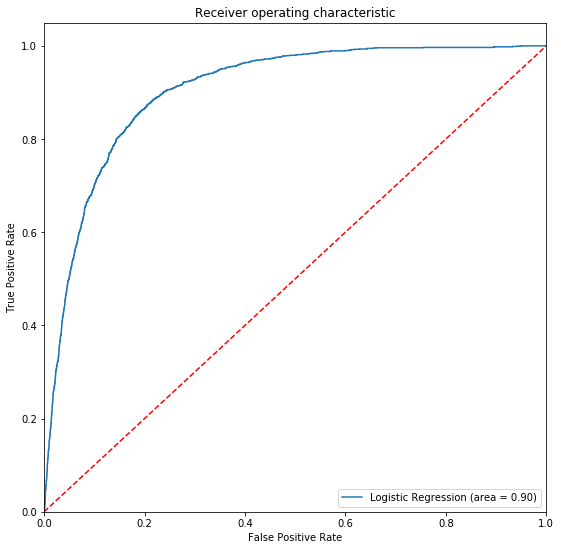

In [63]:
# AUC - ROC curve is a performance measurement for classification problem at various thresholds settings

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = logistic.predict_proba(X_test)[::,1]


logit_roc_auc = roc_auc_score(Y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
auc_score = metrics.roc_auc_score(Y_test, logistic.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.9

In [65]:
acc_LR = accuracy_score(Y_test, y_pred)#lets keep score for final comparison

we can see from above model we are getting 90% accuracy for the logistic model 

# Gaussian Naive Bayes

In [66]:

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,Y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)
print(metrics.confusion_matrix(Y_test, g_pred))
print(classification_report(Y_test,g_pred))

The accuracy of Gaussian Naive Bayes is 0.8651685393258427
[[10579   930]
 [  822   663]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11509
           1       0.42      0.45      0.43      1485

   micro avg       0.87      0.87      0.87     12994
   macro avg       0.67      0.68      0.68     12994
weighted avg       0.87      0.87      0.87     12994



In [67]:
acc_NB = accuracy_score(Y_test, g_pred)#lets keep score for final comparison

we can see from above model we are getting 86% accuracy for the naive bayes model 

# K-Nearest Neighbors


# # K-Nearest Neighbors  we can find best optimal k value using below code  and optimal  k is 14 we will get and since it takes time to execute  am markeing down cells

#Use iteration to find out the best k value for KNN model




from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

#score that comes from testing on the same datapoints that were used for training


max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

#score that comes from testing on the datapoints that were split in the beginning to be used for testing solely


max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

print(sns.__version__)

In [68]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(14)
knn.fit(X_train, Y_train)
k_pred = knn.predict(X_test)
score_knn = knn.score(X_test,Y_test)
print('The accuracy of the KNN Model is',score_knn)
print(metrics.confusion_matrix(Y_test, k_pred))
print(classification_report(Y_test,k_pred))

The accuracy of the KNN Model is 0.8964906880098507
[[11291   218]
 [ 1127   358]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11509
           1       0.62      0.24      0.35      1485

   micro avg       0.90      0.90      0.90     12994
   macro avg       0.77      0.61      0.65     12994
weighted avg       0.88      0.90      0.88     12994



In [69]:
acc_KNN = accuracy_score(Y_test, k_pred) #lets keep score for final comparison

# 3. ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a custemr  subsribed term deposit  or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [70]:
#AUC - ROC curve is a performance measurement for classification problem at various thresholds settings
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

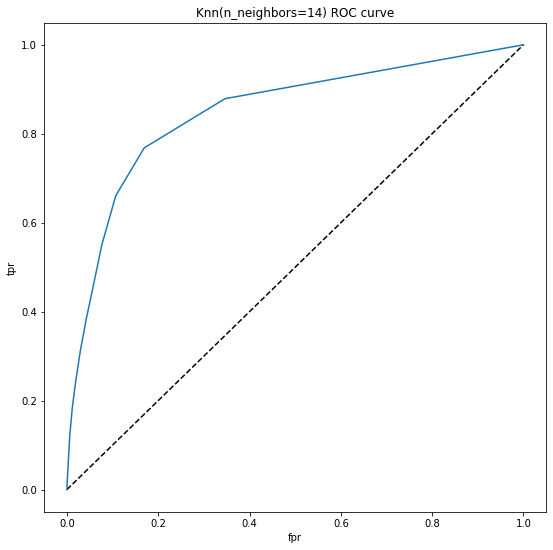

In [71]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.show()

In [72]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.8489115384154049

we can see from above model we are getting 89.6% accuracy for the knn model 

# Support Vector Classifier (SVM/SVC)

In [73]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))

The accuracy of Radical SVC Model is 0.9008003694012621
[[11208   301]
 [  988   497]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11509
           1       0.62      0.33      0.44      1485

   micro avg       0.90      0.90      0.90     12994
   macro avg       0.77      0.65      0.69     12994
weighted avg       0.89      0.90      0.89     12994



Above confusion matrix gives class level accuracy and when there is imabalance in dataset we cant depend on over all acuracy

In [74]:
acc_SVC= accuracy_score(Y_test, svc_pred)#lets keep score for final comparison

we can see from above model we are getting 90.3% accuracy for the rdailcal svc model 

# Decision Tree model

In [75]:
## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [76]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [77]:
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
#9. Print the accuracy of the model & print the confusion matrix

In [79]:
model_entropy.score(X_train, Y_train)  # performance on train data

1.0

In [80]:
model_entropy.score(X_test, Y_test)  # performance on test data

0.8813298445436355

# Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [81]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Visualizing the tree

In [82]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = dataframe_tr.drop('y', axis=1)
feature_cols = xvar.columns

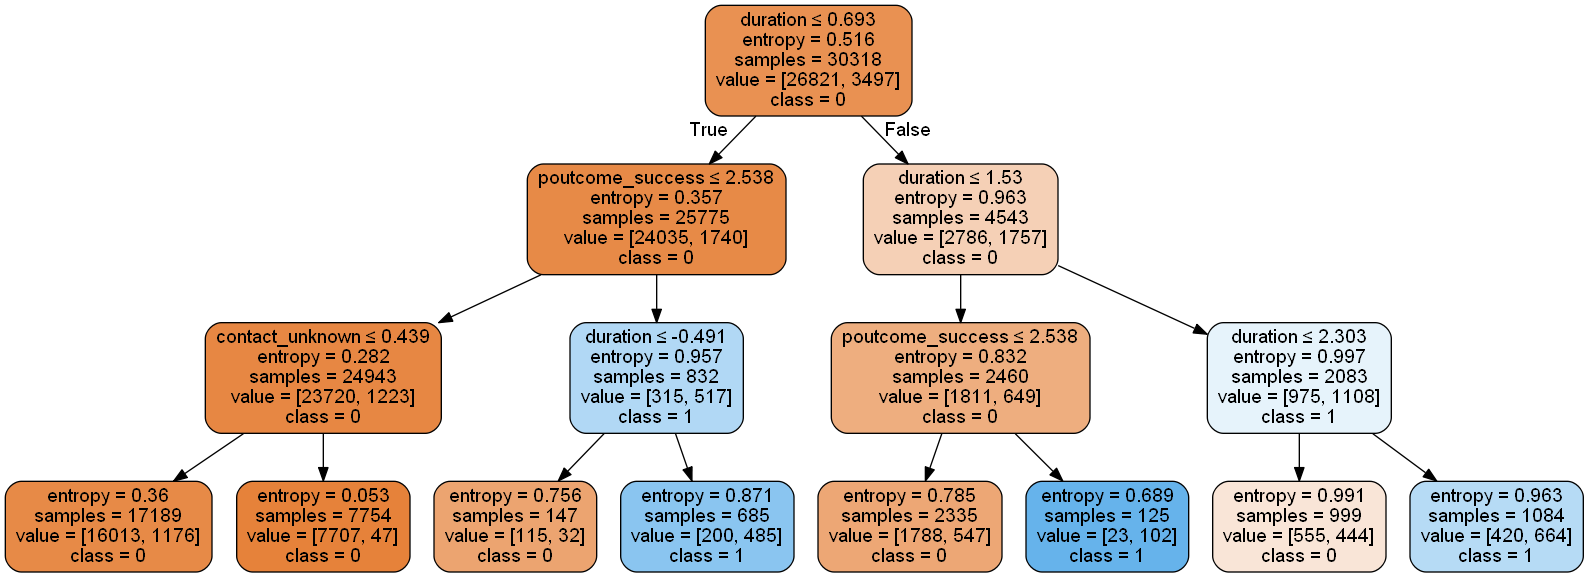

In [83]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('deposit_pruned.png')
Image(graph.create_png())

In [84]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [85]:
print(accuracy_score(Y_test,preds_pruned))
print(accuracy_score(Y_train,preds_pruned_train))

0.898876404494382
0.9047100732238275


In [86]:
acc_DT = accuracy_score(Y_test, preds_pruned)

# We can see above when  we regularize tree test accuracy is increasing on test data  for decision tree

In [87]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.561128
poutcome_success,0.338518
contact_unknown,0.100354
age,0.000000
month_jan,0.000000
housing_yes,0.000000
loan_yes,0.000000
contact_telephone,0.000000
month_aug,0.000000
month_dec,0.000000


#### From the feature importance dataframe we can infer that duration, poutcome_success and contact_unknown are the variables that impact the outcome deposit

In [88]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.898876


# 6. Build the ensemble models and compare the results with  the base models. Note: Random forest can be used only  with Decision trees

### Apply the Random forest model and print the accuracy of Random forest Model for decision tree classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [90]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(Y_test, pred_RF)

In [91]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.898876
0,Random Forest,0.903186


#### Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model

# Lets train Logistic model to compare with ensemble techiniques that we will be bulidng

In [92]:
#LOGISTIC REGRESSION AGAIN AND WILL COMPARE WITH OTHER MODELS 
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
y_pred = logistic.predict(X_test)
score_logistic = logistic.score(X_test,Y_test)
print('The accuracy of the Logistic Regression is', score_logistic)

print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

acc_lr = accuracy_score(Y_test, y_pred)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8992611974757581
[[11164   345]
 [  964   521]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11509
           1       0.60      0.35      0.44      1485

   micro avg       0.90      0.90      0.90     12994
   macro avg       0.76      0.66      0.69     12994
weighted avg       0.88      0.90      0.89     12994



In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf1 = pd.DataFrame({'Method':['logistic regression'], 'accuracy': acc_lr})
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1

,Method,accuracy
0,logistic regression,0.899261


## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [94]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, Y_train)

In [95]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(Y_test, pred_AB)

In [96]:
tempResultsDf1 = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337


# Apply Bagging Classifier Algorithm and print the accuracy.

In [97]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, Y_train)

In [98]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(Y_test, pred_BG)

In [99]:
tempResultsDf1 = pd.DataFrame({'Method':['bagging'], 'accuracy': [acc_BG]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186


bagging accuracy is little bit better than adaboost and decision tree but random forest little bit high accuracy

# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, Y_train)

In [101]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(Y_test, pred_GB)

In [102]:
tempResultsDf1 = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801


In [103]:
# Gradient boost  accuracy is little bit better than LOGISTIC REGRESSION

LETS SEE WITH NAIVE BAYES MODEL AND COMAPRE WITH OTHER MODELS

In [104]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,Y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)
print(metrics.confusion_matrix(Y_test, g_pred))
print(classification_report(Y_test,g_pred))

The accuracy of Gaussian Naive Bayes is 0.8651685393258427
[[10579   930]
 [  822   663]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11509
           1       0.42      0.45      0.43      1485

   micro avg       0.87      0.87      0.87     12994
   macro avg       0.67      0.68      0.68     12994
weighted avg       0.87      0.87      0.87     12994



In [105]:
tempResultsDf1 = pd.DataFrame({'Method':['NAIVE BAYES'], 'accuracy': [acc_NB]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801
0,NAIVE BAYES,0.865169


In [106]:
# K-NEAREST NEIGHBORS AGAIN AND WILL SEE WITH OTHER MODELS FOR COMPARISON
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
score_knn = knn.score(X_test,Y_test)
print('The accuracy of the KNN Model is',score_knn)
print(metrics.confusion_matrix(Y_test, knn_pred))
print(classification_report(Y_test,knn_pred))

The accuracy of the KNN Model is 0.8938740957364938
[[11123   386]
 [  993   492]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11509
           1       0.56      0.33      0.42      1485

   micro avg       0.89      0.89      0.89     12994
   macro avg       0.74      0.65      0.68     12994
weighted avg       0.88      0.89      0.88     12994



In [107]:
tempResultsDf1 = pd.DataFrame({'Method':['KNN'], 'accuracy': [acc_KNN]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801
0,NAIVE BAYES,0.865169
0,KNN,0.896491


In [108]:
# Support Vector Classifier (SVM/SVC) AGAIN AND WILL SEE WITH OTHER MODELS .
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))


The accuracy of Radical SVC Model is 0.9008003694012621
[[11208   301]
 [  988   497]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11509
           1       0.62      0.33      0.44      1485

   micro avg       0.90      0.90      0.90     12994
   macro avg       0.77      0.65      0.69     12994
weighted avg       0.89      0.90      0.89     12994



In [109]:
tempResultsDf1 = pd.DataFrame({'Method':['SVC'], 'accuracy': [acc_SVC]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801
0,NAIVE BAYES,0.865169
0,KNN,0.896491
0,SVC,0.900800


# WE CAN SEE FROM ABOVE BASE MODELS WITH ENSABLE MODELS,   ENSEMBLE MODEL GRADIENT BOOST IS HAVIG HIGHER ACCURACY AND FROM CLASSIFIRES LOGISTIC REGRESSION AND SVC IS HAVING HIGH ACCURACY

# 7. Compare performances of all the models

COMPARE WITH DESCISION TREE ACROSS ALL MODELS

In [110]:
tempResultsDf1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801
0,NAIVE BAYES,0.865169
0,KNN,0.896491
0,SVC,0.900800
0,Decision Tree,0.898876


# lets add random forest accuracy  to list

In [111]:
tempResultsDf1 = pd.DataFrame({'Method':['Random forest'], 'accuracy': [acc_RF]})
resultsDf1 = pd.concat([resultsDf1, tempResultsDf1])
resultsDf1 = resultsDf1[['Method', 'accuracy']]
resultsDf1
resultsDf1

,Method,accuracy
0,logistic regression,0.899261
0,Adaboost,0.896337
0,bagging,0.902186
0,Gradient Boost,0.902801
0,NAIVE BAYES,0.865169
0,KNN,0.896491
0,SVC,0.900800
0,Decision Tree,0.898876
0,Random forest,0.903186


# We can see from all different models  ensemble models(adaboost,bagging,gradient boost, for decison tree random forest) are givig better performace over standard classification alogorithms models such as logistic regression ,naive bayes,knn,support vector classifiers .

# Over all Random forest model  and Gradient Boost is having slightly higher accuracy compare to any model

############################################################################################################################

# (optional ) As we observed dataset is imbalanced ,so lets try to over sample and observe results for few classification models in brief to see the difference

In [112]:
#LETS IMPORT SMOTE TO making the minority class equal to the majority class
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y.shape)

Number transactions X_train dataset:  (30318, 40)
Number transactions y_train dataset:  (30318,)
Number transactions X_test dataset:  (12994, 40)
Number transactions y_test dataset:  (43312,)


In [113]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 3515
Before OverSampling, counts of label '0': 26803 

After OverSampling, the shape of train_X: (53606, 40)
After OverSampling, the shape of train_y: (53606,) 

After OverSampling, counts of label '1': 26803
After OverSampling, counts of label '0': 26803


In [114]:

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   15.9s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   30.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [115]:
clf.best_params_


{'C': 2.0}

In [116]:
#Logistic Regression
logistic = LogisticRegression(C=2,penalty='l2', verbose=5,solver="lbfgs",max_iter=100)
logistic.fit(X_train_res, y_train_res)
y_pred = logistic.predict(X_test)
score_logistic = logistic.score(X_test,Y_test)
print('The accuracy of the Logistic Regression is', score_logistic)

print(metrics.confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The accuracy of the Logistic Regression is 0.7178697860551023
[[8994 2515]
 [1151  334]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     11509
           1       0.12      0.22      0.15      1485

   micro avg       0.72      0.72      0.72     12994
   macro avg       0.50      0.50      0.49     12994
weighted avg       0.80      0.72      0.75     12994



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [117]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_res, y_train_res)
g_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,Y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)
print(metrics.confusion_matrix(Y_test, g_pred))
print(classification_report(Y_test,g_pred))

The accuracy of Gaussian Naive Bayes is 0.7691242111743882
[[9788 1721]
 [1279  206]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     11509
           1       0.11      0.14      0.12      1485

   micro avg       0.77      0.77      0.77     12994
   macro avg       0.50      0.49      0.49     12994
weighted avg       0.80      0.77      0.78     12994



In [118]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
k_pred = knn.predict(X_test)
score_knn = knn.score(X_test,Y_test)
print('The accuracy of the KNN Model is',score_knn)
print(metrics.confusion_matrix(Y_test, k_pred))
print(classification_report(Y_test,k_pred))

The accuracy of the KNN Model is 0.730952747421887
[[9222 2287]
 [1209  276]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     11509
           1       0.11      0.19      0.14      1485

   micro avg       0.73      0.73      0.73     12994
   macro avg       0.50      0.49      0.49     12994
weighted avg       0.80      0.73      0.76     12994



In [119]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_radical.fit(X_train_res,y_train_res)
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))

The accuracy of Radical SVC Model is 0.7280283207634293
[[9163 2346]
 [1188  297]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     11509
           1       0.11      0.20      0.14      1485

   micro avg       0.73      0.73      0.73     12994
   macro avg       0.50      0.50      0.49     12994
weighted avg       0.80      0.73      0.76     12994



# As we tried over sampling on difffrent classification models  we can see that accuracy is dropping and also class level accuracy also dropping

# Conclusion of project:  with out sampling the dataset  accuracy across different models  is good but there  is great imabalance in data set and with over sampling accuracy drastically drops,but to decide whether to over sample or down sample or not it completely  depend on domian knowledge and  Requirements.